# E12: Normal Distribution Analysis of CPU Temperatures

## Objective

This exercise focuses on applying the concepts of the Normal distribution to model the steady-state temperature of a CPU. Given a mean ($\mu$) and a standard deviation ($\sigma$), our goals are to:
1.  Visualize the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF).
2.  Standardize a specific temperature value by calculating its z-score.
3.  Calculate the probability of observing a temperature exceeding a certain threshold (a "right-tail" probability).
4.  Find the temperature that corresponds to a specific percentile of the distribution (an inverse CDF calculation).

## Setup and Distribution Definition

First, let's define the parameters of our Normal distribution for the CPU temperature.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for the Normal model
mu = 65
sigma = 5
L = 60
U = 75

# Create a frozen normal distribution object for easier use
cpu_temp_dist = norm(loc=mu, scale=sigma)

## (a) Plot the PDF and CDF

The **Probability Density Function (PDF)**, $f(x)$, describes the relative likelihood for the random variable (CPU temperature) to take on a given value. The area under the PDF curve over a range corresponds to the probability of the variable falling within that range.

The **Cumulative Distribution Function (CDF)**, $F(x)$, gives the probability that the random variable is less than or equal to a value $x$. It is the integral of the PDF.

We will plot both functions to visualize the distribution.

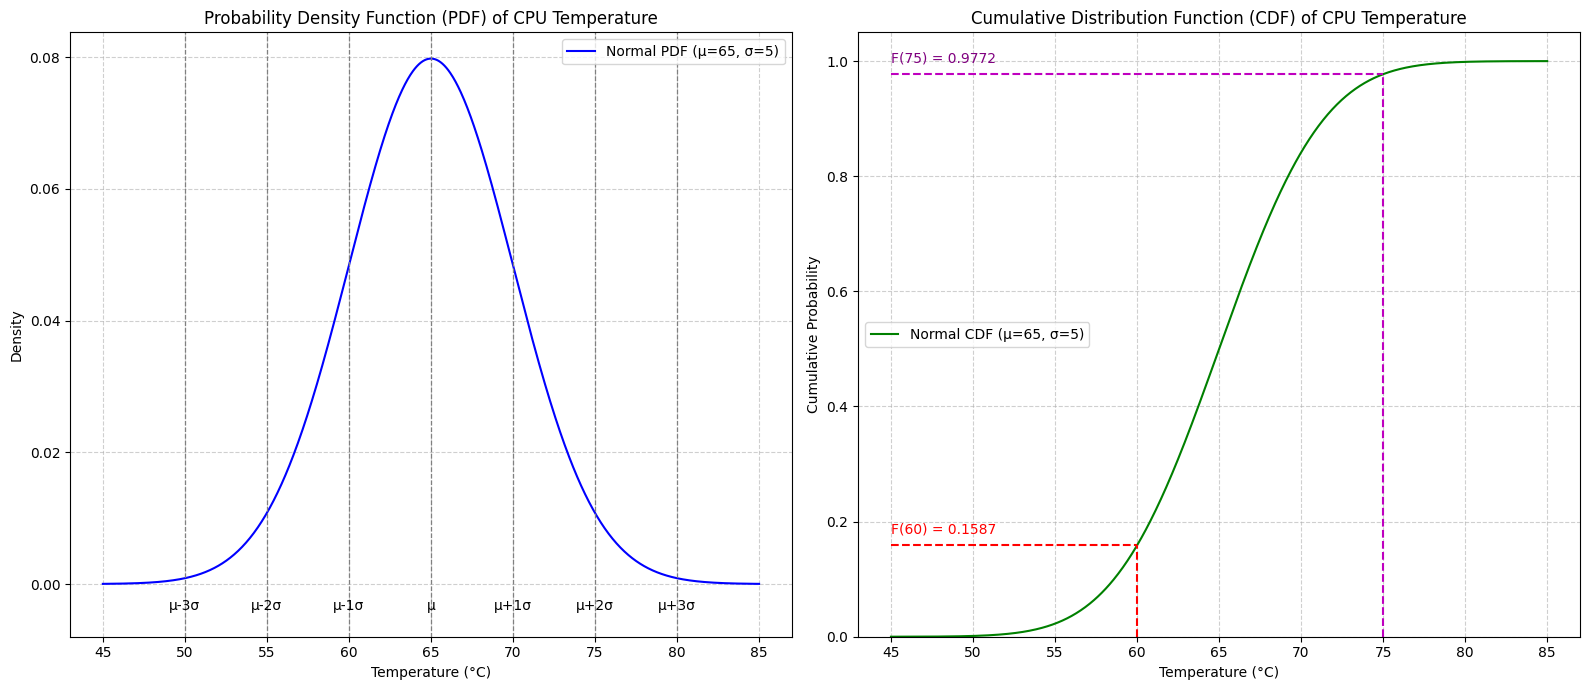

In [2]:
# Generate a range of x values for plotting
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- PDF Plot ---
pdf_values = cpu_temp_dist.pdf(x_values)
ax1.plot(x_values, pdf_values, label=f'Normal PDF (μ={mu}, σ={sigma})', color='blue')
ax1.set_title('Probability Density Function (PDF) of CPU Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Density')

# Mark vertical lines and annotate them
for i in range(-3, 4):
    x_pos = mu + i * sigma
    ax1.axvline(x=x_pos, color='gray', linestyle='--', linewidth=0.9)
    label = f'μ'
    if i > 0:
        label = f'μ+{i}σ'
    elif i < 0:
        label = f'μ{i}σ'
    ax1.text(x_pos, -0.004, label, horizontalalignment='center', fontsize=10)

ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()
ax1.set_ylim(bottom= -0.008) # Make space for labels

# --- CDF Plot ---
cdf_values = cpu_temp_dist.cdf(x_values)
ax2.plot(x_values, cdf_values, label=f'Normal CDF (μ={mu}, σ={sigma})', color='green')
ax2.set_title('Cumulative Distribution Function (CDF) of CPU Temperature')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Cumulative Probability')

# Annotate F(60) and F(75)
f_L = cpu_temp_dist.cdf(L)
f_U = cpu_temp_dist.cdf(U)
ax2.plot([L, L], [0, f_L], 'r--')
ax2.plot([mu - 4*sigma, L], [f_L, f_L], 'r--')
ax2.text(mu - 4*sigma, f_L + 0.02, f'F({L}) = {f_L:.4f}', color='red', fontsize=10)

ax2.plot([U, U], [0, f_U], 'm--')
ax2.plot([mu - 4*sigma, U], [f_U, f_U], 'm--')
ax2.text(mu - 4*sigma, f_U + 0.02, f'F({U}) = {f_U:.4f}', color='purple', fontsize=10)

ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

## (b) Z-scores

A **z-score** measures how many standard deviations a data point is from the mean. The formula is:
$$z = \frac{x - \mu}{\sigma}$$
We will calculate the z-scores for the temperatures $x=60, 65, 75$ to quantify their position relative to the mean.

In [3]:
# Calculate z-scores for x = 60, 65, 75
z_score_60 = (L - mu) / sigma
z_score_65 = (mu - mu) / sigma
z_score_75 = (U - mu) / sigma

print("--- (b) Z-scores Interpretation ---")
print(f"For x = {L}°C, the z-score is {z_score_60:.2f}. This means {L}°C is {abs(z_score_60)} standard deviation below the mean.")
print(f"For x = {mu}°C, the z-score is {z_score_65:.2f}. This means {mu}°C is exactly at the mean.")
print(f"For x = {U}°C, the z-score is {z_score_75:.2f}. This means {U}°C is {abs(z_score_75)} standard deviations above the mean.")

--- (b) Z-scores Interpretation ---
For x = 60°C, the z-score is -1.00. This means 60°C is 1.0 standard deviation below the mean.
For x = 65°C, the z-score is 0.00. This means 65°C is exactly at the mean.
For x = 75°C, the z-score is 2.00. This means 75°C is 2.0 standard deviations above the mean.


## (c) Tail Areas from the CDF

We need to compute the probabilities of the CPU temperature being outside or inside the specification limits $[L, U]$. These are often called "tail areas" for probabilities of extreme values. We use the CDF ($F$) for these calculations:
* $P(X > U) = 1 - F(U)$ (Probability of being too hot)
* $P(X < L) = F(L)$ (Probability of being too cold)
* $P(L \le X \le U) = F(U) - F(L)$ (Probability of being within spec)

These values are critical for reliability, as they represent the probability of the system operating outside its desired thermal conditions.

In [4]:
# Calculate the required probabilities using the CDF
prob_X_gt_U = 1 - cpu_temp_dist.cdf(U)
prob_X_lt_L = cpu_temp_dist.cdf(L)
prob_L_le_X_le_U = cpu_temp_dist.cdf(U) - cpu_temp_dist.cdf(L)

print("--- (c) Tail Area Probabilities ---")
print(f"P(X > {U}°C) = 1 - F({U}) = {prob_X_gt_U:.4f}. This is the probability that the CPU temperature exceeds the upper specification limit.")
print(f"P(X < {L}°C) = F({L}) = {prob_X_lt_L:.4f}. This is the probability that the CPU temperature is below the lower specification limit.")
print(f"P({L}°C <= X <= {U}°C) = F({U}) - F({L}) = {prob_L_le_X_le_U:.4f}. This is the probability that the temperature is within the specified range.")

--- (c) Tail Area Probabilities ---
P(X > 75°C) = 1 - F(75) = 0.0228. This is the probability that the CPU temperature exceeds the upper specification limit.
P(X < 60°C) = F(60) = 0.1587. This is the probability that the CPU temperature is below the lower specification limit.
P(60°C <= X <= 75°C) = F(75) - F(60) = 0.8186. This is the probability that the temperature is within the specified range.


## (d) Percentiles (Inverse CDF)

A **percentile** is the value below which a given percentage of observations in a group of observations falls. For a continuous distribution, the p-th percentile is the value $x_p$ such that $F(x_p) = p$. This is calculated using the inverse of the CDF, often called the Percent Point Function (PPF).

We will find the 5th, 50th, and 95th percentiles and verify the symmetry of the Normal distribution around its mean.

In [5]:
# Find the 5th, 50th, and 95th percentiles using the PPF
p_05 = cpu_temp_dist.ppf(0.05)
p_50 = cpu_temp_dist.ppf(0.50)
p_95 = cpu_temp_dist.ppf(0.95)

print("--- (d) Percentiles ---")
print(f"The 5th percentile (x_0.05) is: {p_05:.4f}°C")
print(f"The 50th percentile (x_0.50), or median, is: {p_50:.4f}°C")
print(f"The 95th percentile (x_0.95) is: {p_95:.4f}°C")

# Verify symmetry
dist_from_mean_95 = p_95 - mu
dist_from_mean_05 = mu - p_05
print("\n--- Verification of Symmetry ---")
print(f"Distance from mean to 95th percentile (x_0.95 - μ): {dist_from_mean_95:.4f}")
print(f"Distance from 5th percentile to mean (μ - x_0.05): {dist_from_mean_05:.4f}")
# Using np.isclose to handle potential floating point inaccuracies
assert np.isclose(dist_from_mean_95, dist_from_mean_05)
print("The distances are numerically equal, confirming the distribution's symmetry.")

--- (d) Percentiles ---
The 5th percentile (x_0.05) is: 56.7757°C
The 50th percentile (x_0.50), or median, is: 65.0000°C
The 95th percentile (x_0.95) is: 73.2243°C

--- Verification of Symmetry ---
Distance from mean to 95th percentile (x_0.95 - μ): 8.2243
Distance from 5th percentile to mean (μ - x_0.05): 8.2243
The distances are numerically equal, confirming the distribution's symmetry.


## Conclusion

This analysis provided quantitative insights into the CPU's thermal behavior based on a Normal distribution model.

The key findings are:
* **Operational Conformance**: The system is expected to operate within its specified temperature range of [60°C, 75°C] approximately **81.9% of the time**. This value serves as a primary metric for its thermal reliability under the given model.

* **Asymmetric Risk Profile**: The risk of deviating from the specified range is not symmetric. There is a **15.9%** chance of the temperature falling below the lower limit, compared to only a **2.3%** chance of exceeding the upper limit. This indicates that any failure modes or performance issues related to low temperatures are significantly more probable than those related to overheating.

* **Typical Operating Range**: The percentile calculation shows that 90% of the time, the CPU's temperature will naturally stay between **56.8°C and 73.2°C**. This interval can be considered the system's typical operating range. The fact that the 95th percentile (73.2°C) is comfortably below the upper specification limit (75°C) suggests a good safety margin against overheating.

Overall, the Normal model has proven effective in translating the system's operational parameters ($\mu$ and $\sigma$) into concrete probabilities, offering a clear view of its thermal performance and reliability.